# Air Quality Prediction Data Set

## **Objectives**

---
Here are the objectives for the given dataset:

1. **Trend Analysis:** Analyze the trends of AQI over time (hourly and daily) across various cities and stations to identify pollution patterns.

2. **AQI Forecasting:** Develop a predictive model to forecast AQI levels for future time periods based on historical air quality data.

3. **Pollutant Impact Assessment:** Investigate the relationship between different pollutants (PM2.5, PM10, NO2, CO, SO2, O3) and AQI to understand their contribution to air quality.

4. **Geographical Comparison:** Compare AQI levels across different cities and monitoring stations to identify regions with the worst air quality.

5. **Anomaly Detection:** Detect any unusual spikes or drops in AQI values that may indicate pollution events or data inconsistencies.

6. **Pattern Recognition:** Identify patterns and correlations between AQI fluctuations and specific times of day, weather conditions, or seasons.


## **Problem Statement:**

The goal is to **predict the Air Quality Index (AQI) for different cities and stations based on historical air quality data**, identifying key factors that influence pollution levels and providing insights to improve air quality management.


In [ ]:
import pickle as plk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 1.Understanding Data

In [ ]:
df = pd.read_csv('/content/city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24141,Patna,2016-03-04,175.65,NaN,49.02,30.56,79.59,NaN,2.68,6.45,19.27,0.37,2.46,0.83,327.0,Very Poor
24142,Patna,2016-03-05,247.52,NaN,67.39,25.74,93.13,NaN,1.67,5.76,15.35,0.42,1.61,0.90,390.0,Very Poor
24143,Patna,2016-03-06,205.00,NaN,47.69,18.50,66.19,NaN,1.26,1.74,3.12,0.38,1.25,0.80,376.0,Very Poor
24144,Patna,2016-03-07,94.47,NaN,33.58,23.43,57.00,NaN,1.05,6.81,19.85,0.20,0.86,0.38,210.0,Poor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24146 entries, 0 to 24145
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24146 non-null  object 
 1   Date        24146 non-null  object 
 2   PM2.5       20259 non-null  float64
 3   PM10        14913 non-null  float64
 4   NO          21272 non-null  float64
 5   NO2         21314 non-null  float64
 6   NOx         20396 non-null  float64
 7   NH3         15774 non-null  float64
 8   CO          22463 non-null  float64
 9   SO2         20990 non-null  float64
 10  O3          20876 non-null  float64
 11  Benzene     20105 non-null  float64
 12  Toluene     18206 non-null  float64
 13  Xylene      8580 non-null   float64
 14  AQI         20408 non-null  float64
 15  AQI_Bucket  20408 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.9+ MB


In [ ]:
df.shape

(24146, 16)

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

PM2.5          3887
PM10           9233
NO             2874
NO2            2832
NOx            3750
NH3            8372
CO             1683
SO2            3156
O3             3270
Benzene        4041
Toluene        5940
Xylene        15566
AQI            3738
AQI_Bucket     3738
dtype: int64


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,20259.000000,14913.000000,21272.000000,21314.000000,20396.000000,15774.000000,22463.000000,20990.000000,20876.000000,20105.000000,18206.000000,8580.000000,20408.000000
mean,68.303614,122.561411,17.589556,29.102762,33.975086,26.591953,2.496435,14.009233,34.512251,2.963002,8.096887,2.596112,170.921011
std,64.142521,91.343183,22.666466,24.275804,32.416548,27.151310,7.669468,18.609088,20.798985,9.698108,15.144094,5.635406,147.161630
min,0.160000,0.210000,0.020000,0.010000,0.000000,0.010000,0.000000,0.210000,0.010000,0.000000,0.000000,0.000000,18.000000
25%,30.180000,59.790000,5.960000,12.560000,14.237500,10.520000,0.490000,5.690000,19.660000,0.140000,0.550000,0.100000,82.000000
50%,49.850000,99.690000,9.860000,22.160000,24.320000,19.315000,0.870000,9.070000,31.300000,1.050000,2.690000,0.750000,120.000000
75%,81.750000,155.070000,19.230000,37.770000,42.030000,33.867500,1.430000,14.280000,45.240000,2.910000,8.450000,2.600000,215.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,391.880000,411.520000,137.450000,2049.000000


In [ ]:
df.describe(include = 'all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,24146,24146,20259.000000,14913.000000,21272.000000,21314.000000,20396.000000,15774.000000,22463.000000,20990.000000,20876.000000,20105.000000,18206.000000,8580.000000,20408.000000,20408
unique,22,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7263
mean,NaN,NaN,68.303614,122.561411,17.589556,29.102762,33.975086,26.591953,2.496435,14.009233,34.512251,2.963002,8.096887,2.596112,170.921011,NaN
std,NaN,NaN,64.142521,91.343183,22.666466,24.275804,32.416548,27.151310,7.669468,18.609088,20.798985,9.698108,15.144094,5.635406,147.161630,NaN
min,NaN,NaN,0.160000,0.210000,0.020000,0.010000,0.000000,0.010000,0.000000,0.210000,0.010000,0.000000,0.000000,0.000000,18.000000,NaN
25%,NaN,NaN,30.180000,59.790000,5.960000,12.560000,14.237500,10.520000,0.490000,5.690000,19.660000,0.140000,0.550000,0.100000,82.000000,NaN
50%,NaN,NaN,49.850000,99.690000,9.860000,22.160000,24.320000,19.315000,0.870000,9.070000,31.300000,1.050000,2.690000,0.750000,120.000000,NaN
75%,NaN,NaN,81.750000,155.070000,19.230000,37.770000,42.030000,33.867500,1.430000,14.280000,45.240000,2.910000,8.450000,2.600000,215.000000,NaN


## 2. Data Visualisation

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24141,Patna,2016-03-04,175.65,NaN,49.02,30.56,79.59,NaN,2.68,6.45,19.27,0.37,2.46,0.83,327.0,Very Poor
24142,Patna,2016-03-05,247.52,NaN,67.39,25.74,93.13,NaN,1.67,5.76,15.35,0.42,1.61,0.90,390.0,Very Poor
24143,Patna,2016-03-06,205.00,NaN,47.69,18.50,66.19,NaN,1.26,1.74,3.12,0.38,1.25,0.80,376.0,Very Poor
24144,Patna,2016-03-07,94.47,NaN,33.58,23.43,57.00,NaN,1.05,6.81,19.85,0.20,0.86,0.38,210.0,Poor


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 3000x800 with 0 Axes>

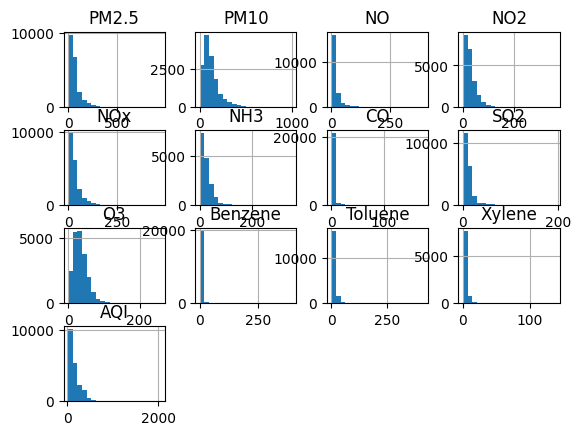

In [ ]:
plt.figure(figsize=(30,8))
df.hist(bins = 20)

## 3. Data Cleaning

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

PM2.5          3887
PM10           9233
NO             2874
NO2            2832
NOx            3750
NH3            8372
CO             1683
SO2            3156
O3             3270
Benzene        4041
Toluene        5940
Xylene        15566
AQI            3738
AQI_Bucket     3738
dtype: int64


In [ ]:
df.drop(columns=["Xylene"],inplace=True)

df.drop(columns=["AQI_Bucket"], inplace=True)

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24141,Patna,2016-03-04,175.65,NaN,49.02,30.56,79.59,NaN,2.68,6.45,19.27,0.37,2.46,327.0
24142,Patna,2016-03-05,247.52,NaN,67.39,25.74,93.13,NaN,1.67,5.76,15.35,0.42,1.61,390.0
24143,Patna,2016-03-06,205.00,NaN,47.69,18.50,66.19,NaN,1.26,1.74,3.12,0.38,1.25,376.0
24144,Patna,2016-03-07,94.47,NaN,33.58,23.43,57.00,NaN,1.05,6.81,19.85,0.20,0.86,210.0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
24141,False
24142,False
24143,False
24144,False


In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24141,Patna,2016-03-04,175.65,NaN,49.02,30.56,79.59,NaN,2.68,6.45,19.27,0.37,2.46,327.0
24142,Patna,2016-03-05,247.52,NaN,67.39,25.74,93.13,NaN,1.67,5.76,15.35,0.42,1.61,390.0
24143,Patna,2016-03-06,205.00,NaN,47.69,18.50,66.19,NaN,1.26,1.74,3.12,0.38,1.25,376.0
24144,Patna,2016-03-07,94.47,NaN,33.58,23.43,57.00,NaN,1.05,6.81,19.85,0.20,0.86,210.0


In [ ]:

df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)
df["AQI"].fillna(df["AQI"].median(),inplace=True)

<ipython-input-24-45163da78ae9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-24-45163da78ae9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

## 4.Feature Engineering

In [ ]:
# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

# Extract the month
df['Month'] = df['Date'].dt.month

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek




In [ ]:
df.drop(columns=["Date"], inplace=True)

## 5.Correlation Analysis

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df["City"]=labelencoder.fit_transform(df["City"])

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df["City"]=labelencoder.fit_transform(df["City"])

Text(0.5, 1.0, 'Correlation Matrix')

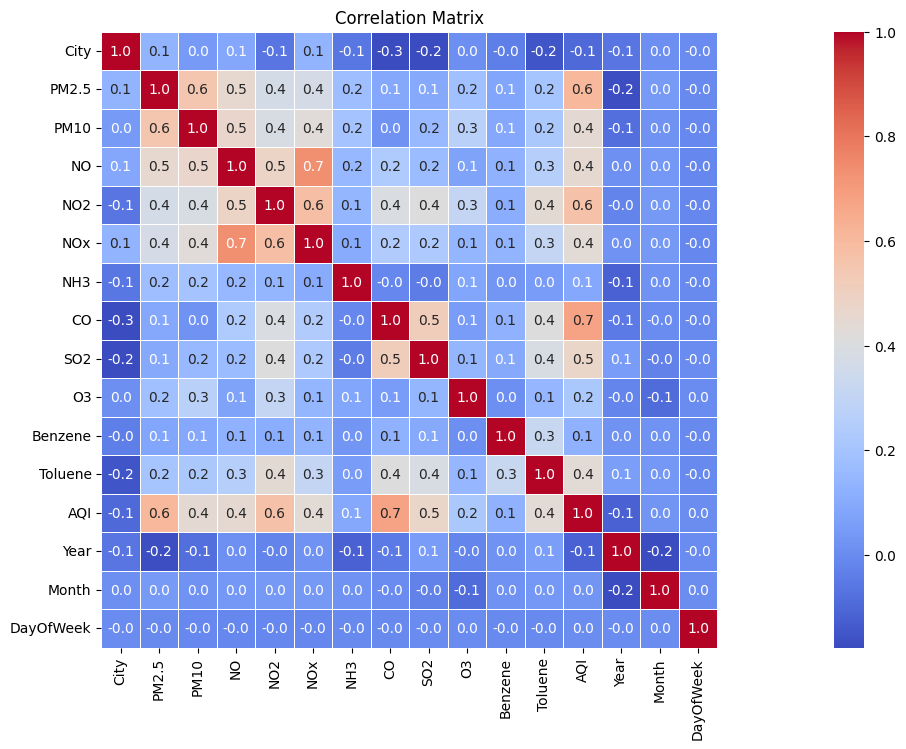

In [ ]:
plt.figure(figsize=(30,8))
# Correlation matrix
# Calculate correlation only for numeric columns
Corr_matrix = df.select_dtypes(include=np.number).corr()

# Heatmap of correlation matrix
sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0.5, robust=True,square=True) # 0.01f should be given for float values.
plt.title('Correlation Matrix')

<Axes: >

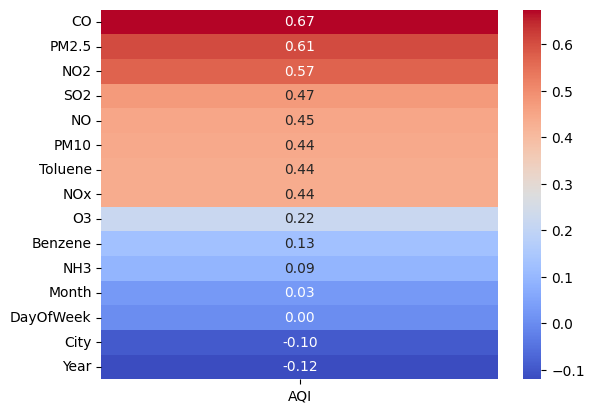

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target=df.corr()["AQI"].sort_values(ascending=False)
target=target.drop("AQI")

sns.heatmap(target.to_frame(),annot=True,fmt=".2f",cbar=True,cmap="coolwarm")


In [ ]:
# droping less correlation features

df.drop('Benzene',axis=1,inplace=True)
df.drop('Month',axis=1,inplace=True)
df.drop('DayOfWeek',axis=1,inplace=True)
df.drop('City',axis=1,inplace=True)
# df.drop('NO2',axis=1,inplace=True)
df.drop('NH3',axis=1,inplace=True)
df.drop('O3',axis=1,inplace=True)
df.drop('Toluene',axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)
df.drop('NO',axis=1,inplace=True)

##6. **Skewnes Detection and log**

In [ ]:
df

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,49.85,99.69,18.22,17.15,0.92,27.64,120.0
1,49.85,99.69,15.69,16.46,0.97,24.55,120.0
2,49.85,99.69,19.30,29.70,17.40,29.07,120.0
3,49.85,99.69,18.48,17.97,1.70,18.59,120.0
4,49.85,99.69,21.42,37.76,22.10,39.33,120.0
...,...,...,...,...,...,...,...
24141,175.65,99.69,30.56,79.59,2.68,6.45,327.0
24142,247.52,99.69,25.74,93.13,1.67,5.76,390.0
24143,205.00,99.69,18.50,66.19,1.26,1.74,376.0
24144,94.47,99.69,23.43,57.00,1.05,6.81,210.0


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >]],
      dtype=object)

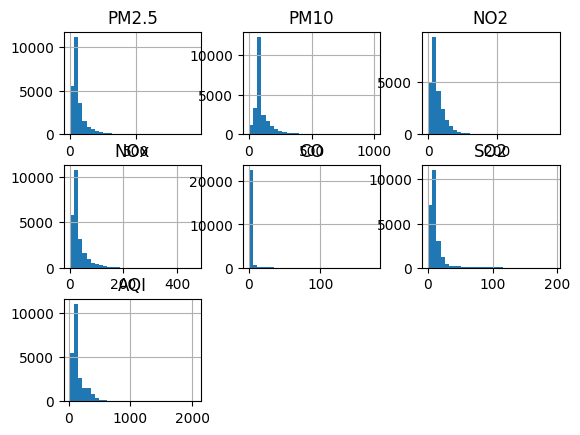

In [ ]:
df.hist(bins = 30)

In [ ]:
import numpy as np
df["PM2.5"]=np.log1p(df["PM2.5"])
df["PM10"]=np.log1p(df["PM10"])

df["CO"]=np.log1p(df["CO"])
df["SO2"]=np.log1p(df["SO2"])
df["NOx"]=np.log1p(df["NOx"])
df["NO2"]=np.log1p(df["NO2"])

# df["AQI"]=np.log1p(df["AQI"])


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >]],
      dtype=object)

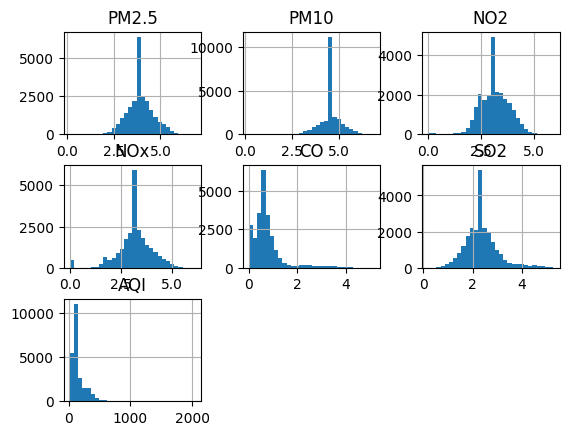

In [ ]:
df.hist(bins = 30)

## **6.Outlier detection**

<Axes: >

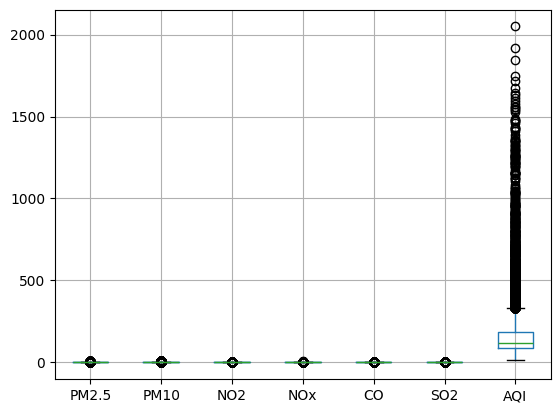

In [ ]:
df.boxplot()

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='AQI')
df_cleaned


,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
1,3.928880,4.612046,2.814810,2.859913,0.678034,3.240637,120.0
3,3.928880,4.612046,2.969388,2.942859,0.993252,2.975019,120.0
34,4.402442,4.612046,3.170945,3.218876,1.214913,3.285787,294.0
56,3.928880,4.612046,3.142427,3.231595,0.625938,2.309561,120.0
57,3.928880,4.612046,3.142427,3.231595,0.625938,2.309561,120.0
...,...,...,...,...,...,...,...
24139,4.977216,4.612046,3.336125,4.123256,0.943906,1.967112,303.0
24140,5.199381,4.612046,3.438814,4.455858,0.920283,1.951608,343.0
24141,5.174170,4.612046,3.451890,4.389375,1.302913,2.008214,327.0
24144,4.558812,4.612046,3.195812,4.060443,0.717840,2.055405,210.0


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]]  # Features
y = df['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 5392.459747408073, RMSE: 73.43336944065737, R-squared: 0.6926351960887163


Data Scaling

---


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming  DataFrame is called 'df'
# Select the features that  want to scale
features = ['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to  data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

<Axes: >

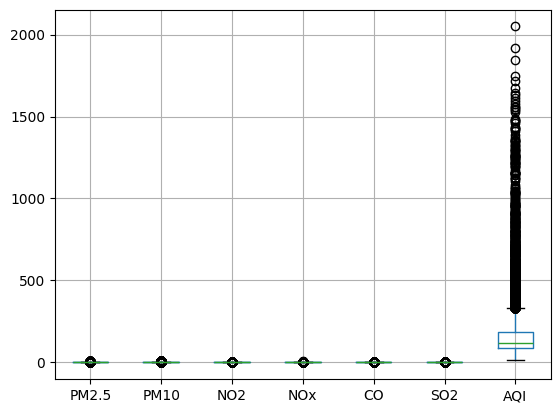

In [ ]:
df.boxplot()

In [ ]:
df.shape

(24146, 7)

In [ ]:
df["AQI"]=np.log1p(df["AQI"])

array([[<Axes: title={'center': 'AQI'}>]], dtype=object)

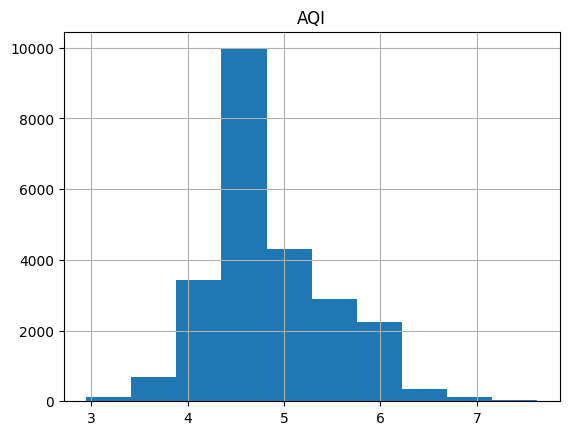

In [ ]:
df.hist('AQI')

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]]  # Features
y = df['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.07657025326549113, RMSE: 0.2767133051833452, R-squared: 0.7972379804337062


In [ ]:
df.shape

(24146, 7)

In [ ]:
df

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.928880,4.612046,2.955951,2.898671,0.652325,3.354804,4.795791
1,3.928880,4.612046,2.814810,2.859913,0.678034,3.240637,4.795791
2,3.928880,4.612046,3.010621,3.424263,2.912351,3.403528,4.795791
3,3.928880,4.612046,2.969388,2.942859,0.993252,2.975019,4.795791
4,3.928880,4.612046,3.109953,3.657389,3.139833,3.697096,4.795791
...,...,...,...,...,...,...,...
24141,5.174170,4.612046,3.451890,4.389375,1.302913,2.008214,5.793014
24142,5.515523,4.612046,3.286161,4.544677,0.982078,1.911023,5.968708
24143,5.327876,4.612046,2.970414,4.207524,0.815365,1.007958,5.932245
24144,4.558812,4.612046,3.195812,4.060443,0.717840,2.055405,5.351858


## **another prediction methods**

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]]  # Features
y = df['AQI'] # Target variable

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,PM2.5,PM10,NOx,SO2,NO2,CO
16483,3.547028,4.301765,2.984166,1.854734,3.259634,0.418710
23170,2.662355,4.015121,3.519869,2.364620,3.048799,0.788457
18769,4.426641,4.521462,3.231595,3.673512,2.403335,1.252763
9233,3.372798,4.612046,3.437208,1.990610,2.908539,0.765468
7256,3.399863,4.213016,2.128232,2.326302,2.783158,1.121678
...,...,...,...,...,...,...
21575,3.124565,4.612046,2.847232,1.646734,2.977568,0.647103
5390,3.665099,4.324662,3.162094,1.435085,3.766535,0.712950
860,3.928880,4.612046,3.231595,2.309561,3.142427,0.625938
15795,3.613078,4.572854,2.983153,1.934416,3.472277,0.530628


In [ ]:
y_train

,AQI
16483,4.382027
23170,4.219508
18769,4.795791
9233,4.369448
7256,4.653960
...,...
21575,4.262680
5390,4.304065
860,4.795791
15795,4.624973


In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms


In [ ]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         0.205408  0.277488  0.793480
Ridge Regression          0.205412  0.277487  0.793481
Lasso Regression          0.466691  0.610613 -0.000016
ElasticNet Regression     0.466691  0.610613 -0.000016
Decision Tree             0.183272  0.287403  0.778458
Random Forest             0.132076  0.204846  0.887454
Gradient Boosting         0.150121  0.219549  0.870718
Support Vector Regressor  0.145717  0.211066  0.880516
K-Nearest Neighbors       0.139056  0.213781  0.877422
Neural Network            0.153599  0.217555  0.873056


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]]  # Features
y = df['AQI'] # Target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

# saving model


In [ ]:
import pickle as pkl
pkl.dump(model,open("air_condition.pkl","wb"))